## Question 1

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [2]:
root = './DIP_2019_A4/'

In [3]:
def read(path, arg = cv2.IMREAD_UNCHANGED):
    args = {'gray' : cv2.IMREAD_GRAYSCALE, 'unchanged' : cv2.IMREAD_UNCHANGED, 'color' : cv2.IMREAD_COLOR}
    return cv2.imread(path, args[arg])

In [4]:
def strided(img, kernel):
    img = img.astype('float32')
    img = np.pad(img, (np.int16((kernel.shape[0]-1)/2), np.int16((kernel.shape[1]-1)/2)), 'reflect')
    expanded_input = np.lib.stride_tricks.as_strided(
    img,
    shape=(
        img.shape[0] - kernel.shape[0] + 1,
        img.shape[1] - kernel.shape[1] + 1,
        kernel.shape[0],
        kernel.shape[1],
    ),
    strides=(
        img.strides[0],
        img.strides[1],
        img.strides[0],
        img.strides[1],
    )
)
    return expanded_input

In [5]:
def hit_or_miss(img, kernel):
    mask = np.where(kernel!=-1)
    if np.all(img[mask] == kernel[mask]):
        return 1
    else:
        return 0

In [6]:
def conv_hom(img, kernel):
    kernel_ones = np.where(kernel == 1, 1, 0)
    kernel_zeros = np.where(kernel == 0, 1, 0)
    
    strides = strided(img, kernel)
    out = np.zeros(img.shape)
    
    out_one = np.tensordot(strides, kernel_ones)
    out_zero = np.tensordot(strides, kernel_zeros)
    
    # blocks with correct 1's matches
    out_one = np.where(out_one == np.sum(kernel_ones), 1, 0)
    # blocks with correct 0's matches
    out_zero = np.where(out_zero == 0, 1, 0)
    

    return np.uint8(out_one&out_zero)


In [7]:
def skeletonisation(img, s1, s2):
    prev= img.copy()
    arr_s1 = []
    arr_s2 = []
    for i in range(4):
        arr_s1.append(s1)
        s1 = np.rot90(s1)
        
        arr_s2.append(s2)
        s2 = np.rot90(s2)
        
    iteration = 0
    while True:
        iteration += 1
        print("iter =", iteration, end = '\r')
        for i in range(4):
            img = img ^ conv_hom(img, arr_s1[i])
            img = img ^ conv_hom(img, arr_s2[i])
        if np.allclose(prev, img):
            break
        prev = img.copy()
    return img

## Part  I

In [8]:
img = read(root+'fingerp.jpg', 'gray')
ret,threshImg = cv2.threshold(img,127,1,cv2.THRESH_BINARY_INV)

time taken : 2.492900848388672


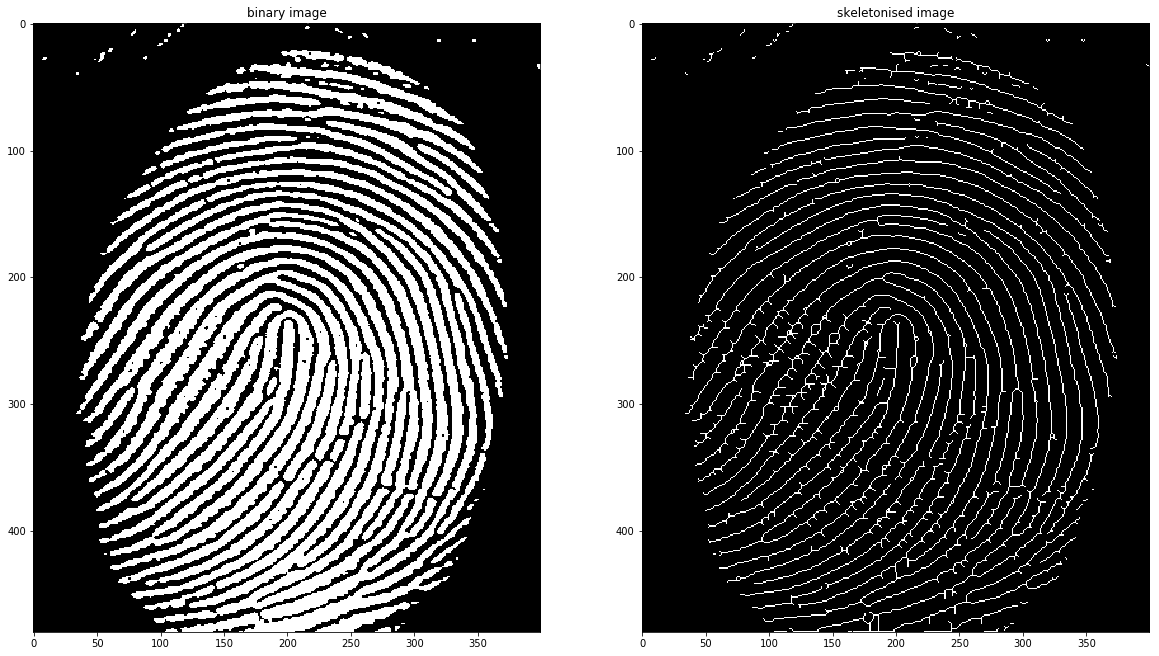

In [9]:
s1 = np.array([[0,0,0], [-1,1,-1], [1,1,1]])
s2 = np.array([[-1,0,0], [1,1,0], [-1,1,-1]])

st = time.time()
ans = skeletonisation(threshImg, s1, s2)
en = time.time()
print('time taken :', en-st)
_, plots = plt.subplots(1,2,figsize = (20,20))
plots[0].imshow(threshImg, cmap = 'gray')
plots[0].set_title('binary image')
plots[1].imshow(ans, cmap = 'gray')
plots[1].set_title('skeletonised image')

plt.show()

## Part II

- S1: To detect edges and other curves which are close to being edge, curves etc. 
- S2: We use this structuring element to detect right angled triangles

## Part III

- Rotation by 90 is required to detect horizontal and vector edges and right hand corners
- More iterations give thinner result. Hence more iterations thinner the skeleton.

## Part IV

### Image with holes

In [10]:
img = read(root+'car.jpg', 'gray')
ret,threshImg = cv2.threshold(img,127,1,cv2.THRESH_BINARY_INV)

time taken : 11.568033456802368


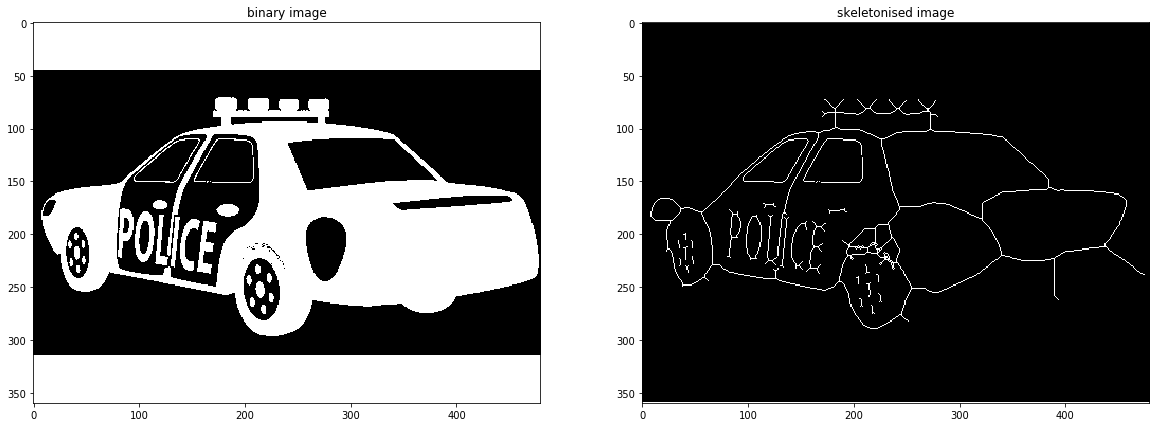

In [11]:
st = time.time()
ans = skeletonisation(threshImg, s1, s2)
en = time.time()
print('time taken :', en-st)
_, plots = plt.subplots(1,2,figsize = (20,20))
plots[0].imshow(threshImg, cmap = 'gray')
plots[0].set_title('binary image')
plots[1].imshow(ans, cmap = 'gray')
plots[1].set_title('skeletonised image')

plt.show()

- Due to holes, different components are observed in the skeleton

### Solid image

In [12]:
img = read(root+'hand.jpg', 'gray')
ret,threshImg = cv2.threshold(img,127,1,cv2.THRESH_BINARY)

time taken : 5.394799709320068


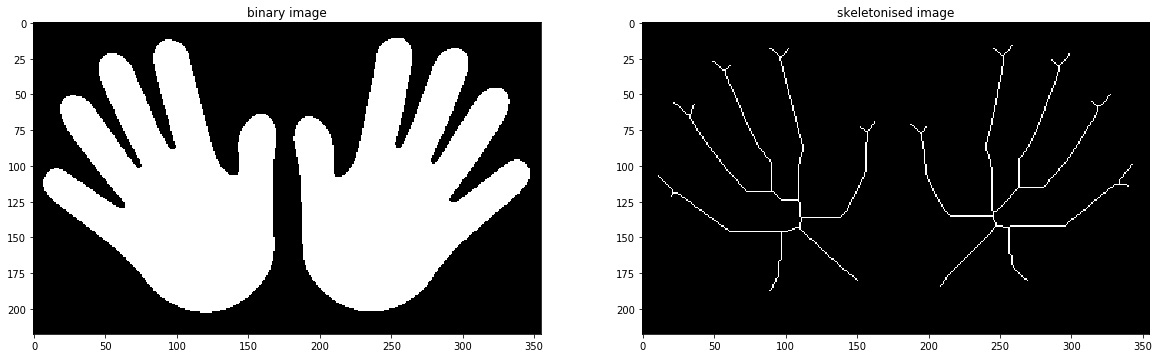

In [13]:
st = time.time()
ans = skeletonisation(threshImg, s1, s2)
en = time.time()
print('time taken :', en-st)
_, plots = plt.subplots(1,2,figsize = (20,20))
plots[0].imshow(threshImg, cmap = 'gray')
plots[0].set_title('binary image')
plots[1].imshow(ans, cmap = 'gray')
plots[1].set_title('skeletonised image')

plt.show()

- The object is solid, thus the skeleton is connected

### Thin image

In [14]:
img = read(root+'needle.jpg', 'gray')
ret,threshImg = cv2.threshold(img,127,1,cv2.THRESH_BINARY)

time taken : 1.0746760368347168


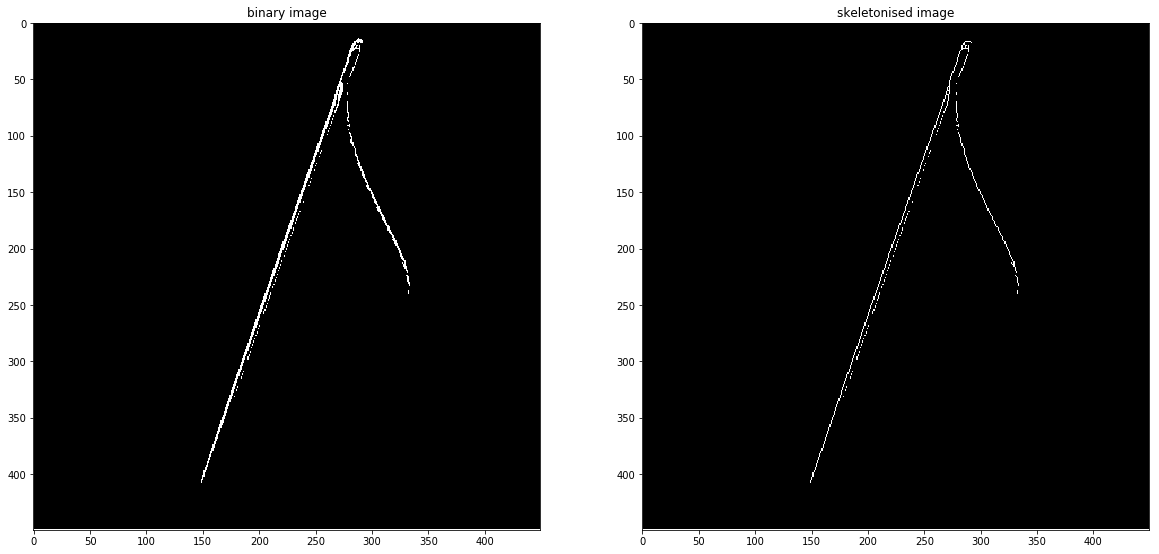

In [15]:
st = time.time()
ans = skeletonisation(threshImg, s1, s2)
en = time.time()
print('time taken :', en-st)
_, plots = plt.subplots(1,2,figsize = (20,20))
plots[0].imshow(threshImg, cmap = 'gray')
plots[0].set_title('binary image')
plots[1].imshow(ans, cmap = 'gray')
plots[1].set_title('skeletonised image')

plt.show()

- The object is already much like skeletonised, thus no considerable change is observed

### Irregular image

In [16]:
img = read(root+'leaf.jpg', 'gray')
ret,threshImg = cv2.threshold(img,127,1,cv2.THRESH_BINARY_INV)
threshImg = cv2.resize(threshImg, (256, 256))

time taken : 2.8191773891448975


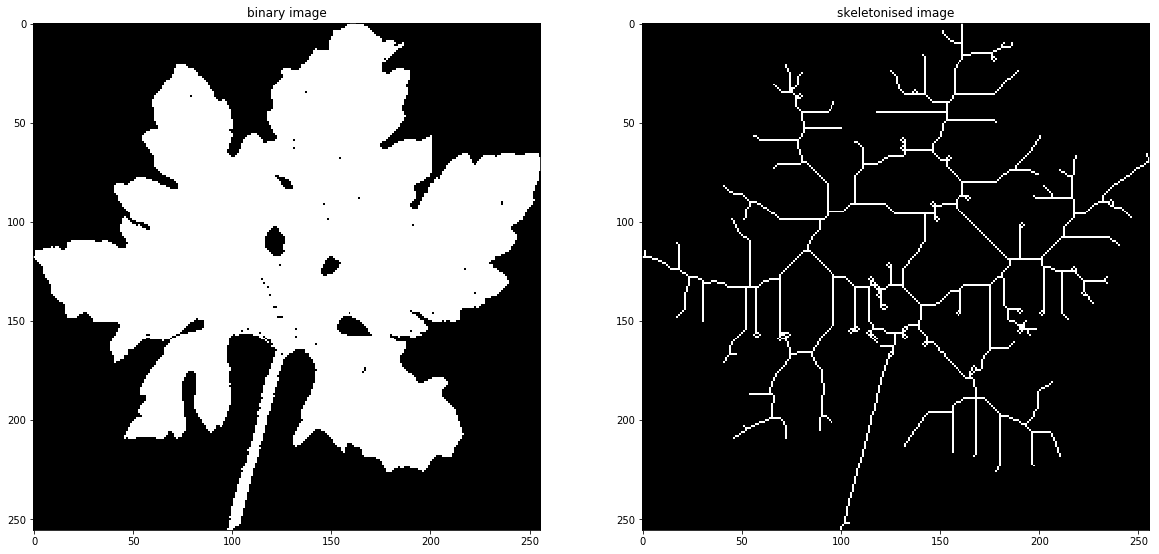

In [17]:
st = time.time()
ans = skeletonisation(threshImg, s1, s2)
en = time.time()
print('time taken :', en-st)
_, plots = plt.subplots(1,2,figsize = (20,20))
plots[0].imshow(threshImg, cmap = 'gray')
plots[0].set_title('binary image')
plots[1].imshow(ans, cmap = 'gray')
plots[1].set_title('skeletonised image')

plt.show()

## Question 2

In [18]:
img = read(root+'kidney.jpg', 'gray')

In [19]:
ret,threshImg = cv2.threshold(img,130,1,cv2.THRESH_BINARY)

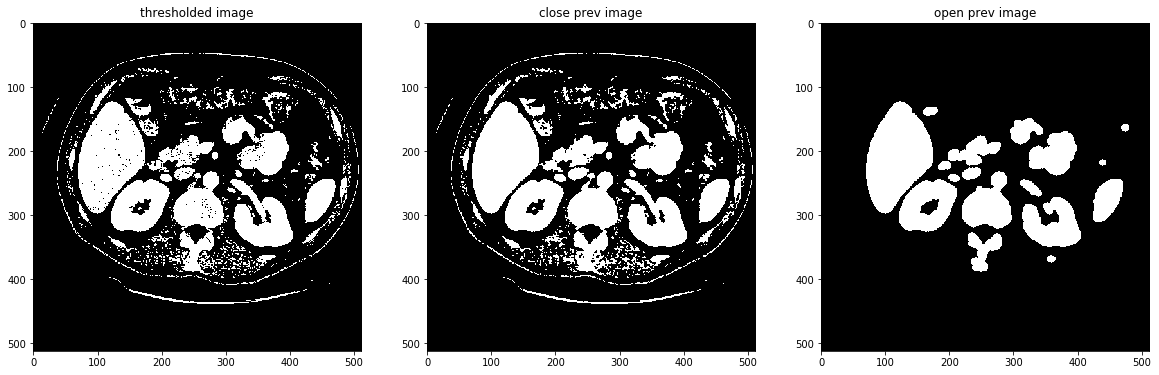

In [20]:
se_disk_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
se_disk_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

closed_img = cv2.morphologyEx(threshImg, cv2.MORPH_CLOSE, se_disk_close)
opened_img = cv2.morphologyEx(closed_img, cv2.MORPH_OPEN, se_disk_open)
_, plots = plt.subplots(1,3,figsize = (20,20))
plots[0].imshow(threshImg, cmap = 'gray')
plots[0].set_title('thresholded image')
plots[1].imshow(closed_img, cmap = 'gray')
plots[1].set_title('close prev image')
plots[2].imshow(opened_img, cmap = 'gray')
plots[2].set_title('open prev image')

plt.show()

In [21]:
class utils:
    def __init__(self, img):
        self.img = img
        self.labels = -(np.ones(img.shape)).astype('int32')
        self.parent = {}
        
    def in_bounds(self, row, col):
        if row < self.img.shape[0] and row >= 0:
            if col < self.img.shape[1] and col >= 0:
                return True
        return False
    
    def get_label(self, row, col):
        if self.img[row, col] == 1:
            return self.labels[row, col]
        return -1
    
    def set_label(self, row, col, val):
        self.labels[row, col] = val
    
    def give_neighbours(self, row, col):
        neighbours = []
        if self.in_bounds(row-1, col-1):
            if self.get_label(row-1, col-1) != -1:
                neighbours.append(self.labels[row-1, col-1])
        if self.in_bounds(row-1, col):
            if self.get_label(row-1, col) != -1:
                neighbours.append(self.labels[row-1, col])
        if self.in_bounds(row-1, col+1):
            if self.get_label(row-1, col+1) != -1:
                neighbours.append(self.labels[row-1, col+1])
        if self.in_bounds(row, col-1):
            if self.get_label(row, col-1) != -1:
                neighbours.append(self.labels[row, col-1])
        return neighbours    
        
    def find_parent(self, key):
        if key in self.parent.keys():
            return self.find_parent(self.parent[key])
        else:
            return key
        
    def union(self, key1, key2):
        par1 = self.find_parent(key1)
        par2 = self.find_parent(key2)
        
        if par1 != par2:
            self.parent[par1] = par2

In [22]:
def connected_components(img):
    utility = utils(img)
    colors = 1
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            if img[row,col] == 1:
                neighbours = utility.give_neighbours(row, col)
                if len(neighbours) == 0:
                    utility.set_label(row, col, colors)
                    colors += 1
                else:
                    utility.set_label(row, col, min(neighbours))
                    for label in neighbours:
                        utility.union(label, min(neighbours))
                    
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            label = utility.get_label(row, col)
            if label != -1:
                utility.set_label(row, col, utility.find_parent(label))
    
    unique_labels = np.unique(utility.labels).tolist()
    return unique_labels, utility.labels

In [23]:
def give_colored_img(unique_labels, labels):
    num_labels = len(unique_labels)
    r_colors = np.uint8(np.random.randint(10, 250, size = num_labels))
    g_colors = np.uint8(np.random.randint(10, 250, size = num_labels))
    b_colors = np.uint8(np.random.randint(10, 250, size = num_labels))

    r_comp = np.uint8(np.zeros(labels.shape))
    g_comp = np.uint8(np.zeros(labels.shape))
    b_comp = np.uint8(np.zeros(labels.shape))

    for i, label in enumerate(unique_labels):
        if label != -1:
            ind = np.where(labels == label)
            r_comp[ind] = r_colors[i]
            g_comp[ind] = g_colors[i] 
            b_comp[ind] = b_colors[i] 


    colored_comp = np.dstack((r_comp, g_comp))
    colored_comp = np.dstack((colored_comp, b_comp))
    
    return colored_comp


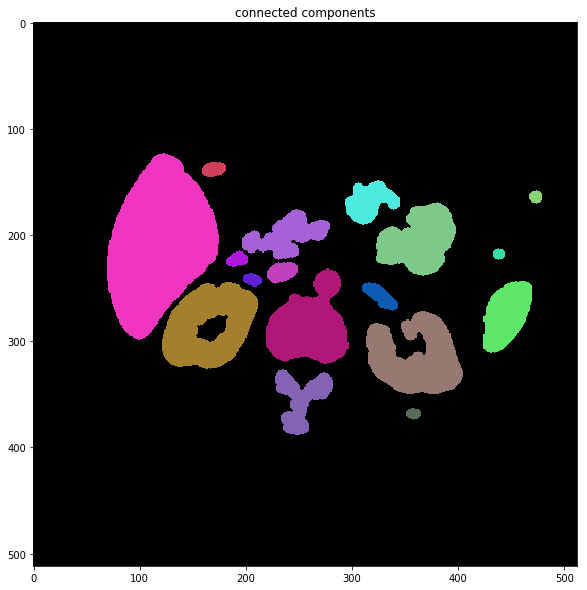

In [24]:
unique_labels, labels = connected_components(opened_img)
colored_comp = give_colored_img(unique_labels, labels)
plt.figure(figsize = (10,10))
plt.title('connected components')
plt.imshow(colored_comp)
plt.show()

## Question 3

### Part I

In [25]:
img = read(root+'coins.jpg', 'gray')

In [26]:
ret,threshImg = cv2.threshold(img,127,1,cv2.THRESH_BINARY)
disk_se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,21))
img_eroded = cv2.erode(threshImg, disk_se, iterations=1)

In [27]:
img_size = img_eroded.shape
img_eroded[10:img_size[0]-10, 10:img_size[1]-10] = 0

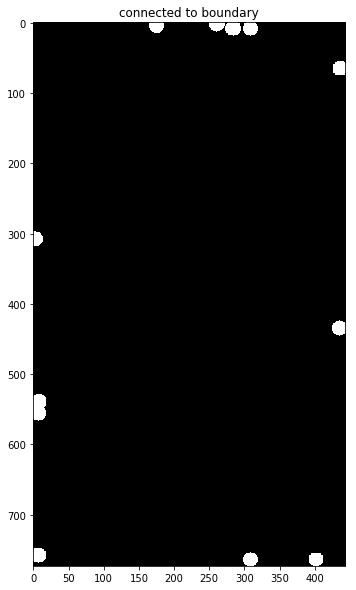

In [28]:
img_dilate = cv2.dilate(img_eroded, disk_se, iterations=1)
plt.figure(figsize = (10,10))
plt.imshow(img_dilate, cmap = 'gray')
plt.title('connected to boundary')
plt.show()

## Part II

In [29]:
img = read(root+'coins.jpg', 'gray')
ret,threshImg = cv2.threshold(img,127,1,cv2.THRESH_BINARY)

In [30]:
labels, labeled_img = connected_components(threshImg)

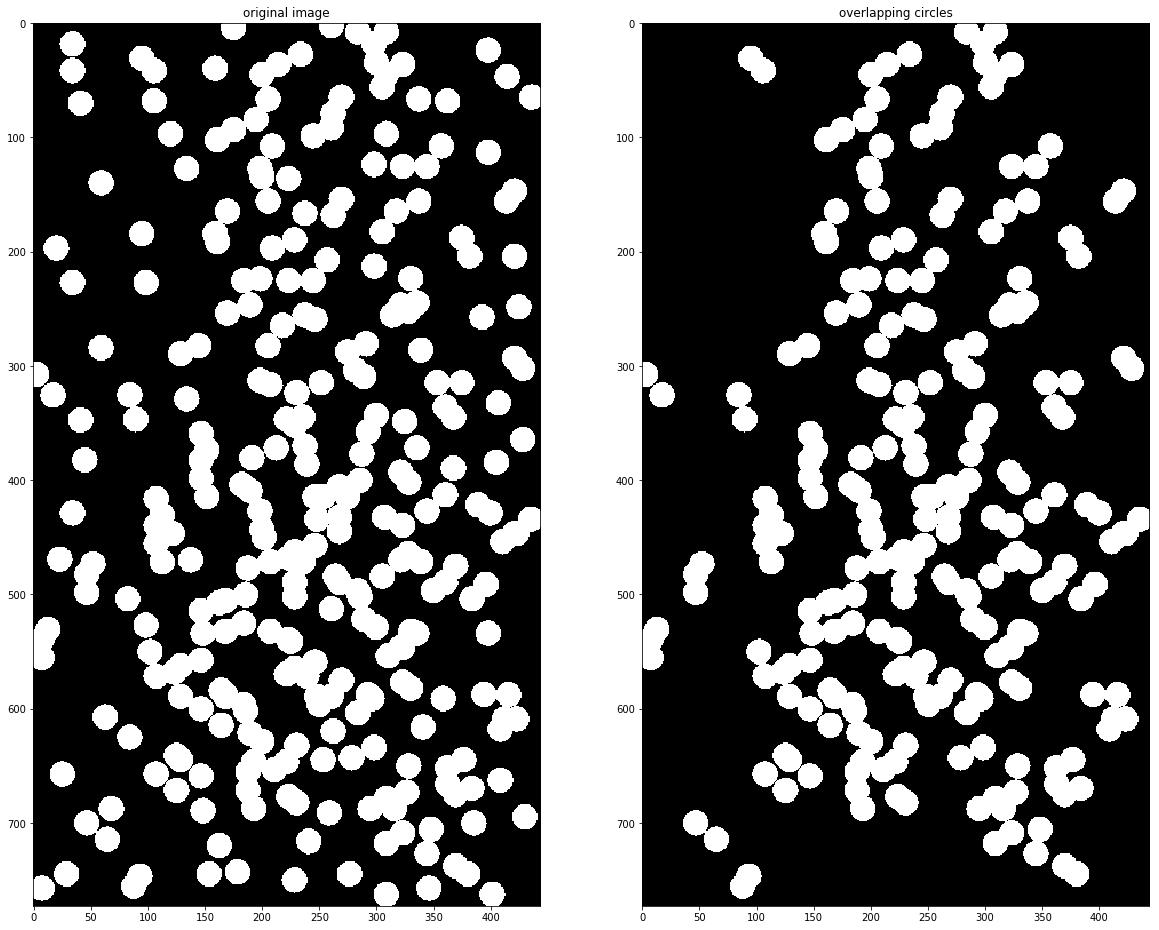

In [31]:
overlapping_img = np.zeros(labeled_img.shape)

for label in labels:
    (indx, indy) = np.where(labeled_img == label)
    if len(indx) >= 400 and label != -1:
        overlapping_img[indx, indy] = 1

_, plts = plt.subplots(1,2, figsize = (20,20))
plts[0].imshow(threshImg, cmap = 'gray')
plts[0].set_title('original image')
plts[1].imshow(overlapping_img, cmap = 'gray')
plts[1].set_title('overlapping circles')
plt.show()

## Part III

In [32]:
img = read(root+'coins.jpg', 'gray')
ret,threshImg = cv2.threshold(img,127,1,cv2.THRESH_BINARY)

In [33]:
labels, labeled_img = connected_components(threshImg)

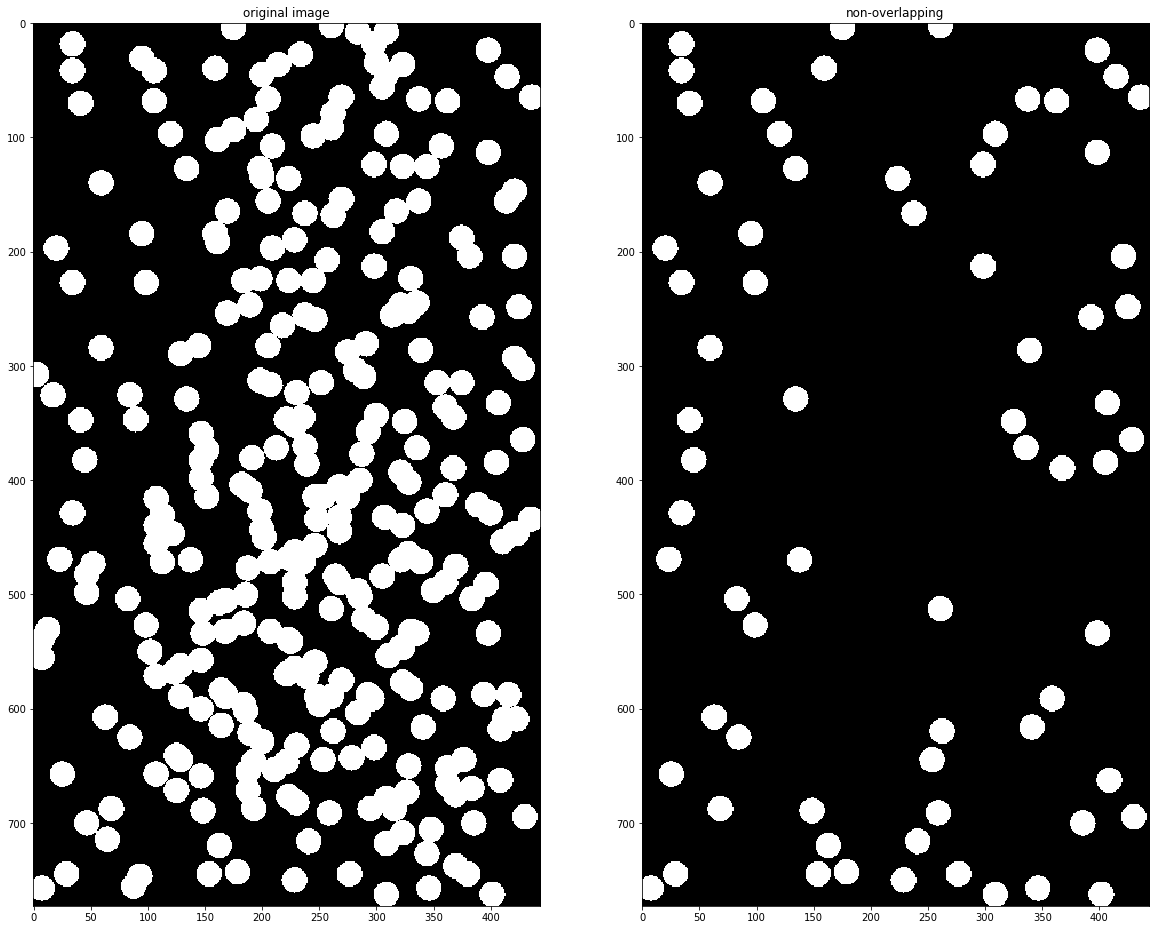

In [34]:
noverlapping_img = np.zeros(labeled_img.shape)

for label in labels:
    (indx, indy) = np.where(labeled_img == label)
    if len(indx) < 400 and label != -1:
        noverlapping_img[indx, indy] = 1
        
_, plts = plt.subplots(1,2, figsize = (20,20))
plts[0].imshow(threshImg, cmap = 'gray')
plts[0].set_title('original image')
plts[1].imshow(noverlapping_img, cmap = 'gray')
plts[1].set_title('non-overlapping')
plt.show()

# Question 4

## Part I

In [35]:
img = read(root+'objects.png', 'gray')

In [36]:
o_labels, o_labelimg = connected_components(cv2.threshold(img,127,1,cv2.THRESH_BINARY)[1])
h_labels, h_labelimg = connected_components(cv2.threshold(img,127,1,cv2.THRESH_BINARY_INV)[1])

In [37]:
def check_bound(row, col, rmax, cmax):
    if row>=0 and row<rmax and col>=0 and col<cmax:
        return True
    return False

In [38]:
def make_conn_graph(o_labels, o_labelimg, h_labels, h_labelimg):
    o_labels_con = {}
    for label in o_labels:
        if label != -1:
            o_labels_con[label] = []
            indx, indy = np.where(o_labelimg == label)
            for i in range(len(indx)):
                for j in range(-1,2):
                    for k in range(-1,2):
                        if check_bound(indx[i]+j, indy[i]+k, o_labelimg.shape[0], o_labelimg.shape[1]):
                            if h_labelimg[indx[i]+j, indy[i]+k] != -1:
                                o_labels_con[label].append(h_labelimg[indx[i]+j, indy[i]+k])
            o_labels_con[label] = np.array(o_labels_con[label])
    return o_labels_con

object with holes : 6


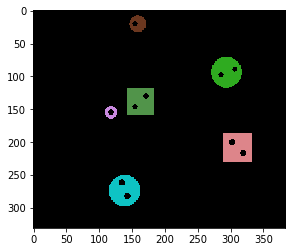

In [39]:
o_labels_con = make_conn_graph(o_labels, o_labelimg, h_labels, h_labelimg)
obj_with_holes = []
for label in o_labels:
    if label != -1:
        o_labels_con[label] = np.array(o_labels_con[label])
        if len(np.unique(o_labels_con[label])) >=2 :
            obj_with_holes.append(label)
            
obj_with_holes = np.array(obj_with_holes)
print('object with holes :', len(obj_with_holes))

col_img = give_colored_img(obj_with_holes, o_labelimg)
plt.imshow(col_img)
plt.show()

## Part 2

In [40]:
img = read(root+'objects.png', 'gray')
ret, threshImg = cv2.threshold(img,127,1,cv2.THRESH_BINARY)
o_labels, o_labelimg = connected_components(threshImg)

In [41]:
def hit_or_miss(hkernel, mkernel, patch):
    if np.sum(np.multiply(patch, hkernel)) < np.sum(hkernel) or np.sum(np.multiply(mkernel, patch)) > 0:
        return False
    return True

In [42]:
miss_kernel = np.array([[1,1,1],[1,0,0],[1,0,0]])
hit_kernel = np.array([[0,0,0],[0,1,0],[0,0,0]])

In [43]:
def give_req_obj(hit, miss, labels, label_img, b_img):
    obj_labels = []
    for label in labels:
        if label != -1:
            indx, indy = np.where(label_img==label)
            for i in range(len(indx)):
                if hit_or_miss(hit, miss, b_img[indx[i]-1:indx[i]+2, indy[i]-1:indy[i]+2]) == True:
                    obj_labels.append(label)
                    break
    return np.array(obj_labels)

In [44]:
squares = give_req_obj(hit_kernel, miss_kernel, o_labels, o_labelimg, threshImg)

no of squares : 11


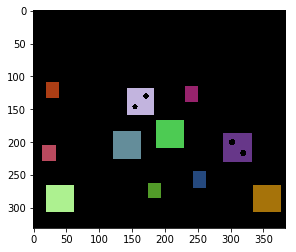

In [45]:
print('no of squares :', len(squares))
col_img = give_colored_img(squares, o_labelimg)
plt.imshow(col_img)
plt.show()

## Part III

In [46]:
hole_square = []
for square in squares:
    if square in obj_with_holes:
        hole_square.append(square)
hole_square = np.array(hole_square)

squares with holes: 2


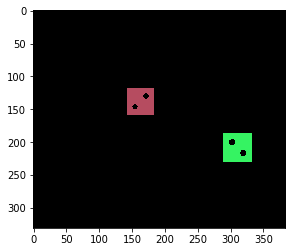

In [47]:
print('squares with holes:', len(hole_square))
col_img = give_colored_img(hole_square, o_labelimg)
plt.imshow(col_img)
plt.show()

## Part IV

In [48]:
circles = []
for label in o_labels:
    if label != -1:
        if label not in squares:
            if label not in obj_with_holes:
                circles.append(label)
circles = np.array(circles)

circles with no holes: 12


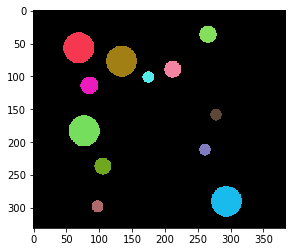

In [49]:
print('circles with no holes:', len(circles))
col_img = give_colored_img(circles, o_labelimg)
plt.imshow(col_img)
plt.show()

# Question 5

## Part I

In [50]:
img = cv2.cvtColor(read(root+'89vmUVt.png', 'color'), cv2.COLOR_BGR2RGB)
img = img[20:-20,20:-20]

In [51]:
def freqColor(img):
    img = img.reshape((-1,img.shape[-1]))
    colors, counts = np.unique(img, return_counts=True, axis=0)
    return colors[counts.argsort()][::-1]

In [52]:
def bin_image_color(img, color):
    ret = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if np.array_equal(img[i,j,:], color):
                ret[i,j] = 1
    return np.uint8(ret)
    

In [53]:
colors_sorted = freqColor(img)

In [54]:
bin_images = []
imgs = []
for i in range(1,6):
    bin_color = bin_image_color(img, colors_sorted[i])
    bin_images.append(bin_color)
    labels, labeled_img = connected_components(bin_color)
    imgs.append((labels,labeled_img))
    print('for color =', colors_sorted[i], "conn comp =", len(np.unique(labels)))

for color = [ 31  73 125] conn comp = 28
for color = [255   0   0] conn comp = 25
for color = [  0 176  80] conn comp = 75
for color = [0 0 0] conn comp = 242
for color = [112  48 160] conn comp = 35


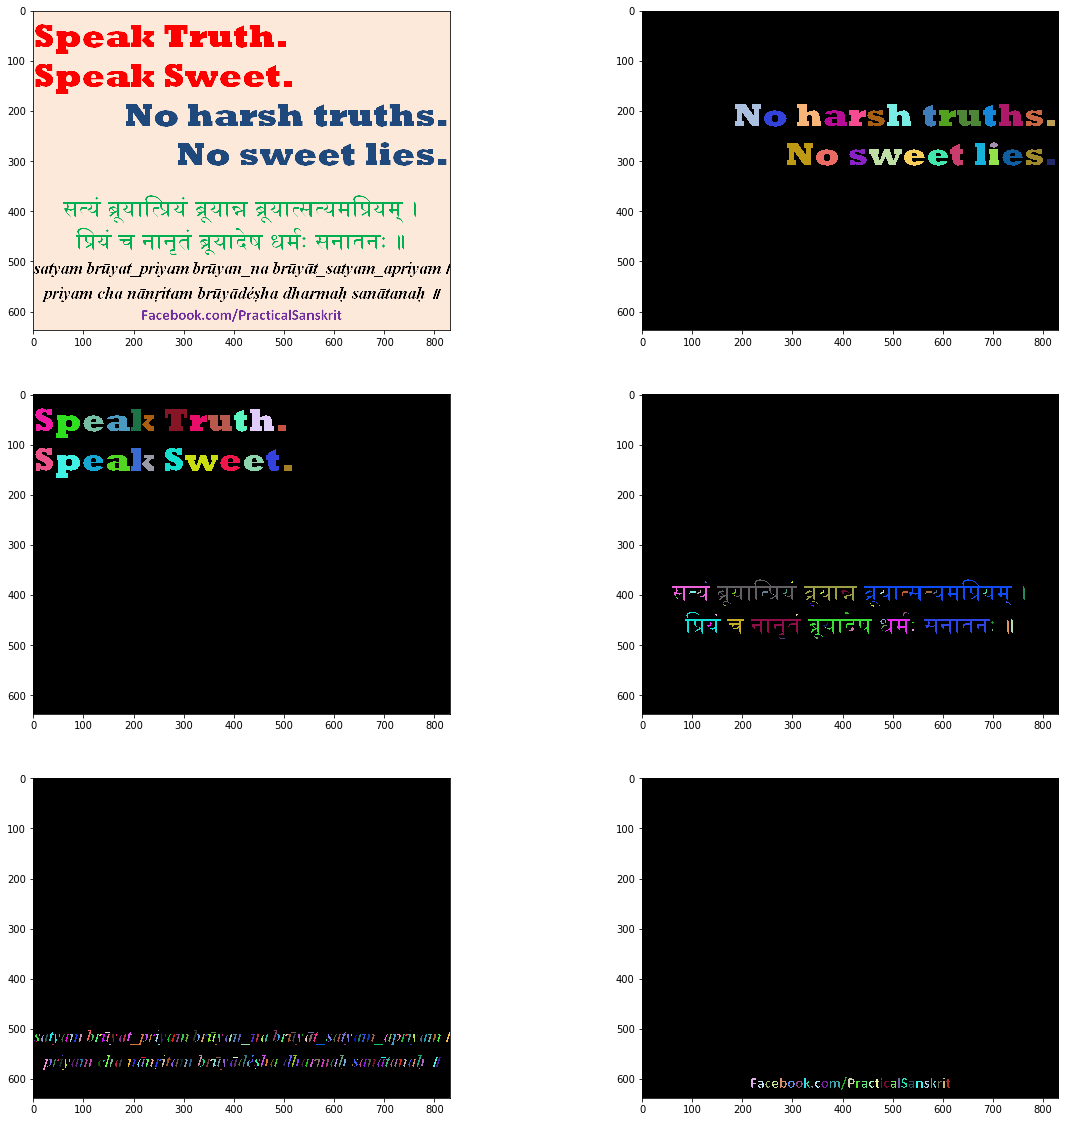

In [55]:
_, plts = plt.subplots(3,2, figsize = (20,20))
plts[0][0].imshow(img)
plts[0][1].imshow(give_colored_img(imgs[0][0], imgs[0][1]))
plts[1][0].imshow(give_colored_img(imgs[1][0], imgs[1][1]))
plts[1][1].imshow(give_colored_img(imgs[2][0], imgs[2][1]))
plts[2][0].imshow(give_colored_img(imgs[3][0], imgs[3][1]))
plts[2][1].imshow(give_colored_img(imgs[4][0], imgs[4][1]))
plt.show()

## Part II

In [56]:
img = read(root+'q51.jpg', 'gray')

In [57]:
def give_object_hc(img, hole_cnt, tval):
#     thresh = cv2.adaptiveThreshold(img,1,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,25,25)
    _, thresh = cv2.threshold(img, tval, 1, cv2.THRESH_BINARY_INV)
    o_labels, o_labelimg = connected_components(thresh)
#     thresh = cv2.adaptiveThreshold(img,1,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,25,25)
    _, thresh = cv2.threshold(img, tval, 1, cv2.THRESH_BINARY)
    
    h_labels, h_labelimg = connected_components(thresh)
    o_labels_con = make_conn_graph(o_labels, o_labelimg, h_labels, h_labelimg)
    obj_with_holes = []
    for i,label in enumerate(o_labels):
        if label != -1:
            if len(np.unique(o_labels_con[label])) == hole_cnt:
                o_labels_con[label] = np.array(o_labels_con[label])
                obj_with_holes.append(label)
                
    col_img = give_colored_img(obj_with_holes, o_labelimg)
    return col_img

In [58]:
one_empty = give_object_hc(img, 2, 100)
two_empty = give_object_hc(img, 3, 100)

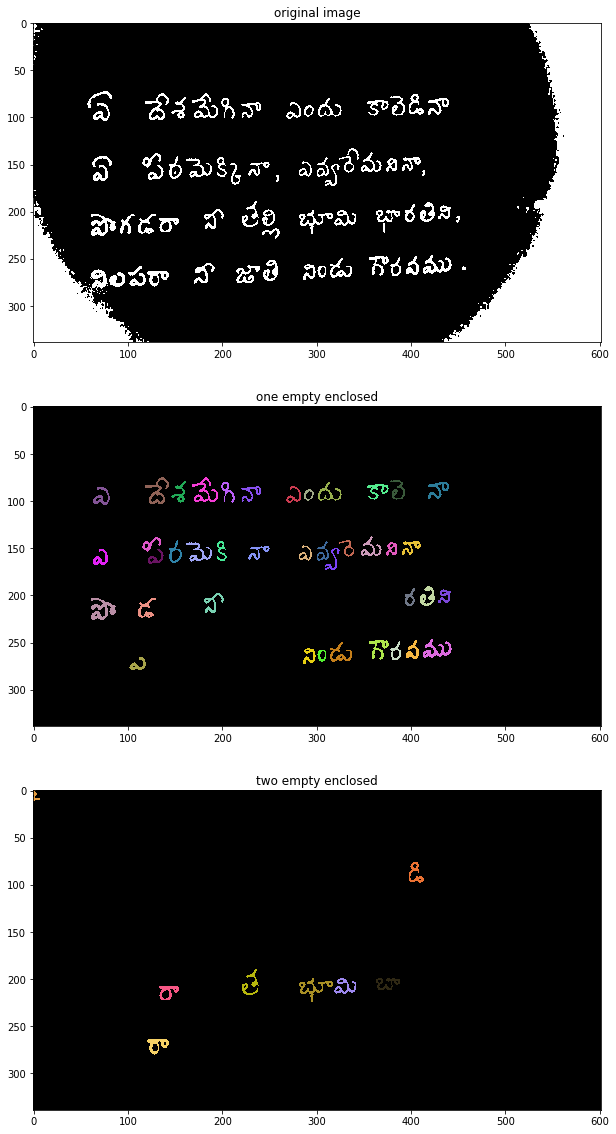

In [59]:
_, plts = plt.subplots(3,1,figsize = (20,20))
plts[0].imshow(cv2.threshold(img, 100, 1, cv2.THRESH_BINARY_INV)[1], cmap = 'gray')
plts[0].set_title('original image')
plts[1].imshow(one_empty)
plts[1].set_title('one empty enclosed')
plts[2].imshow(two_empty)
plts[2].set_title('two empty enclosed')
plt.show()

In [60]:
img = read(root+'q52.jpg', 'gray')

In [61]:
one_empty = give_object_hc(img, 2, 205)
two_empty = give_object_hc(img, 3, 205)

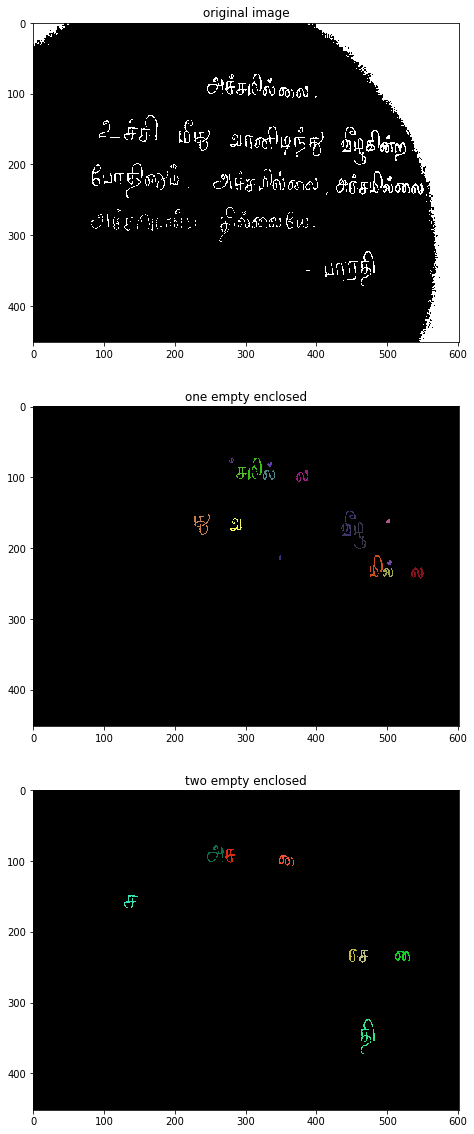

In [62]:
_, plts = plt.subplots(3,1,figsize = (20,20))
plts[0].imshow(cv2.threshold(img, 205, 1, cv2.THRESH_BINARY_INV)[1], cmap = 'gray')
plts[0].set_title('original image')
plts[1].imshow(one_empty)
plts[1].set_title('one empty enclosed')
plts[2].imshow(two_empty)
plts[2].set_title('two empty enclosed')
plt.show()